In [2]:
import numpy as np
import json
from os import listdir
from os.path import isfile, join
import matplotlib as plt
from IPython.display import Image
from sklearn.neighbors import NearestNeighbors
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
#prints out all the filepaths for the images

# PATH_IMG = u'/root/Etsy-sov/SBIR_regression/lampshades_images/images_8_27'
PATH_IMG = u'lampshades_images/images_8_27'

filepaths = []
for subdir, dirs, files in os.walk(PATH_IMG):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".npy"):
            #print (filepath)
            filepaths.append(filepath)
            
jpg_of_images = []
for thing in filepaths:
    jpg_of_images.append(thing[0:-7])
            
#just the numpy arrays
just_numpy_arrays_images = []
for thing in jpg_of_images:
    just_numpy_arrays_images.append(np.load("{}_np.npy".format(thing)))
test_data=np.array(just_numpy_arrays_images)
data = np.array(just_numpy_arrays_images)

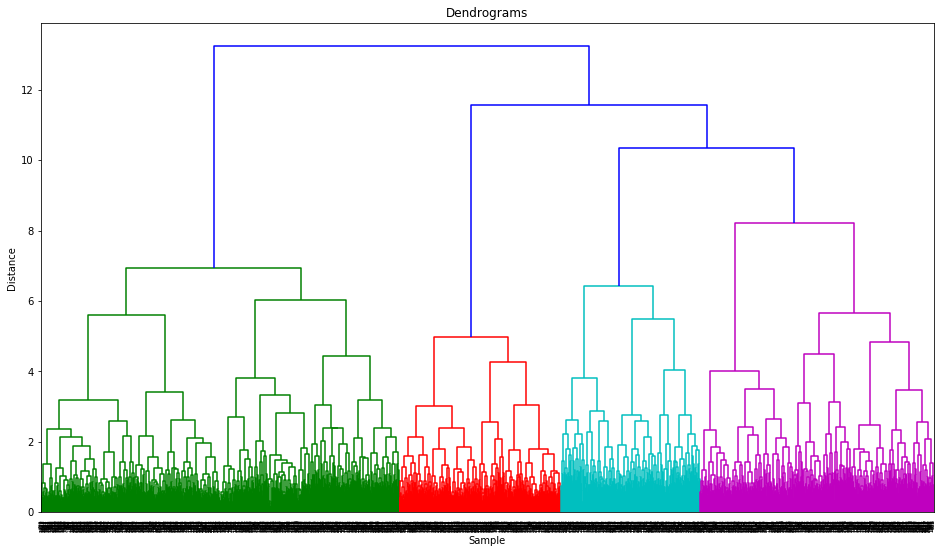

In [4]:
### Divisive Hierarchal Clustering
from sklearn.metrics.pairwise import pairwise_distances
import sys
%matplotlib inline
import matplotlib.pyplot as plt 

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage

data_scaled = normalize(data)
linked = linkage(data_scaled, 'ward') # ward minimizes variant between clusters

plt.figure(figsize=(16, 9))  
plt.title("Dendrograms")  
plt.ylabel("Distance")
plt.xlabel("Sample")
dend = dendrogram(
    linked,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)


### Centroid Scrap

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(n_clusters=10, random_state=0).fit(data)
print('labels:', kmeans.labels_)
centroids = kmeans.cluster_centers_ # 10 clusters, 256 features
print('centroids shape', centroids.shape)

('labels:', array([9, 9, 9, ..., 8, 3, 0], dtype=int32))
('centroids shape', (10, 256))


In [12]:
## Nearest Image to centroids
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min

X = data

km = KMeans(n_clusters=10).fit(X)
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, X)
print('id:', closest)

('id:', array([1065, 1451,  377, 1856, 2084, 1258, 1777, 1591, 1424,  430]))


In [20]:
pwd

u'/home/cpark/Etsy-sov/SBIR_regression'

In [15]:
data[1065]

(256,)

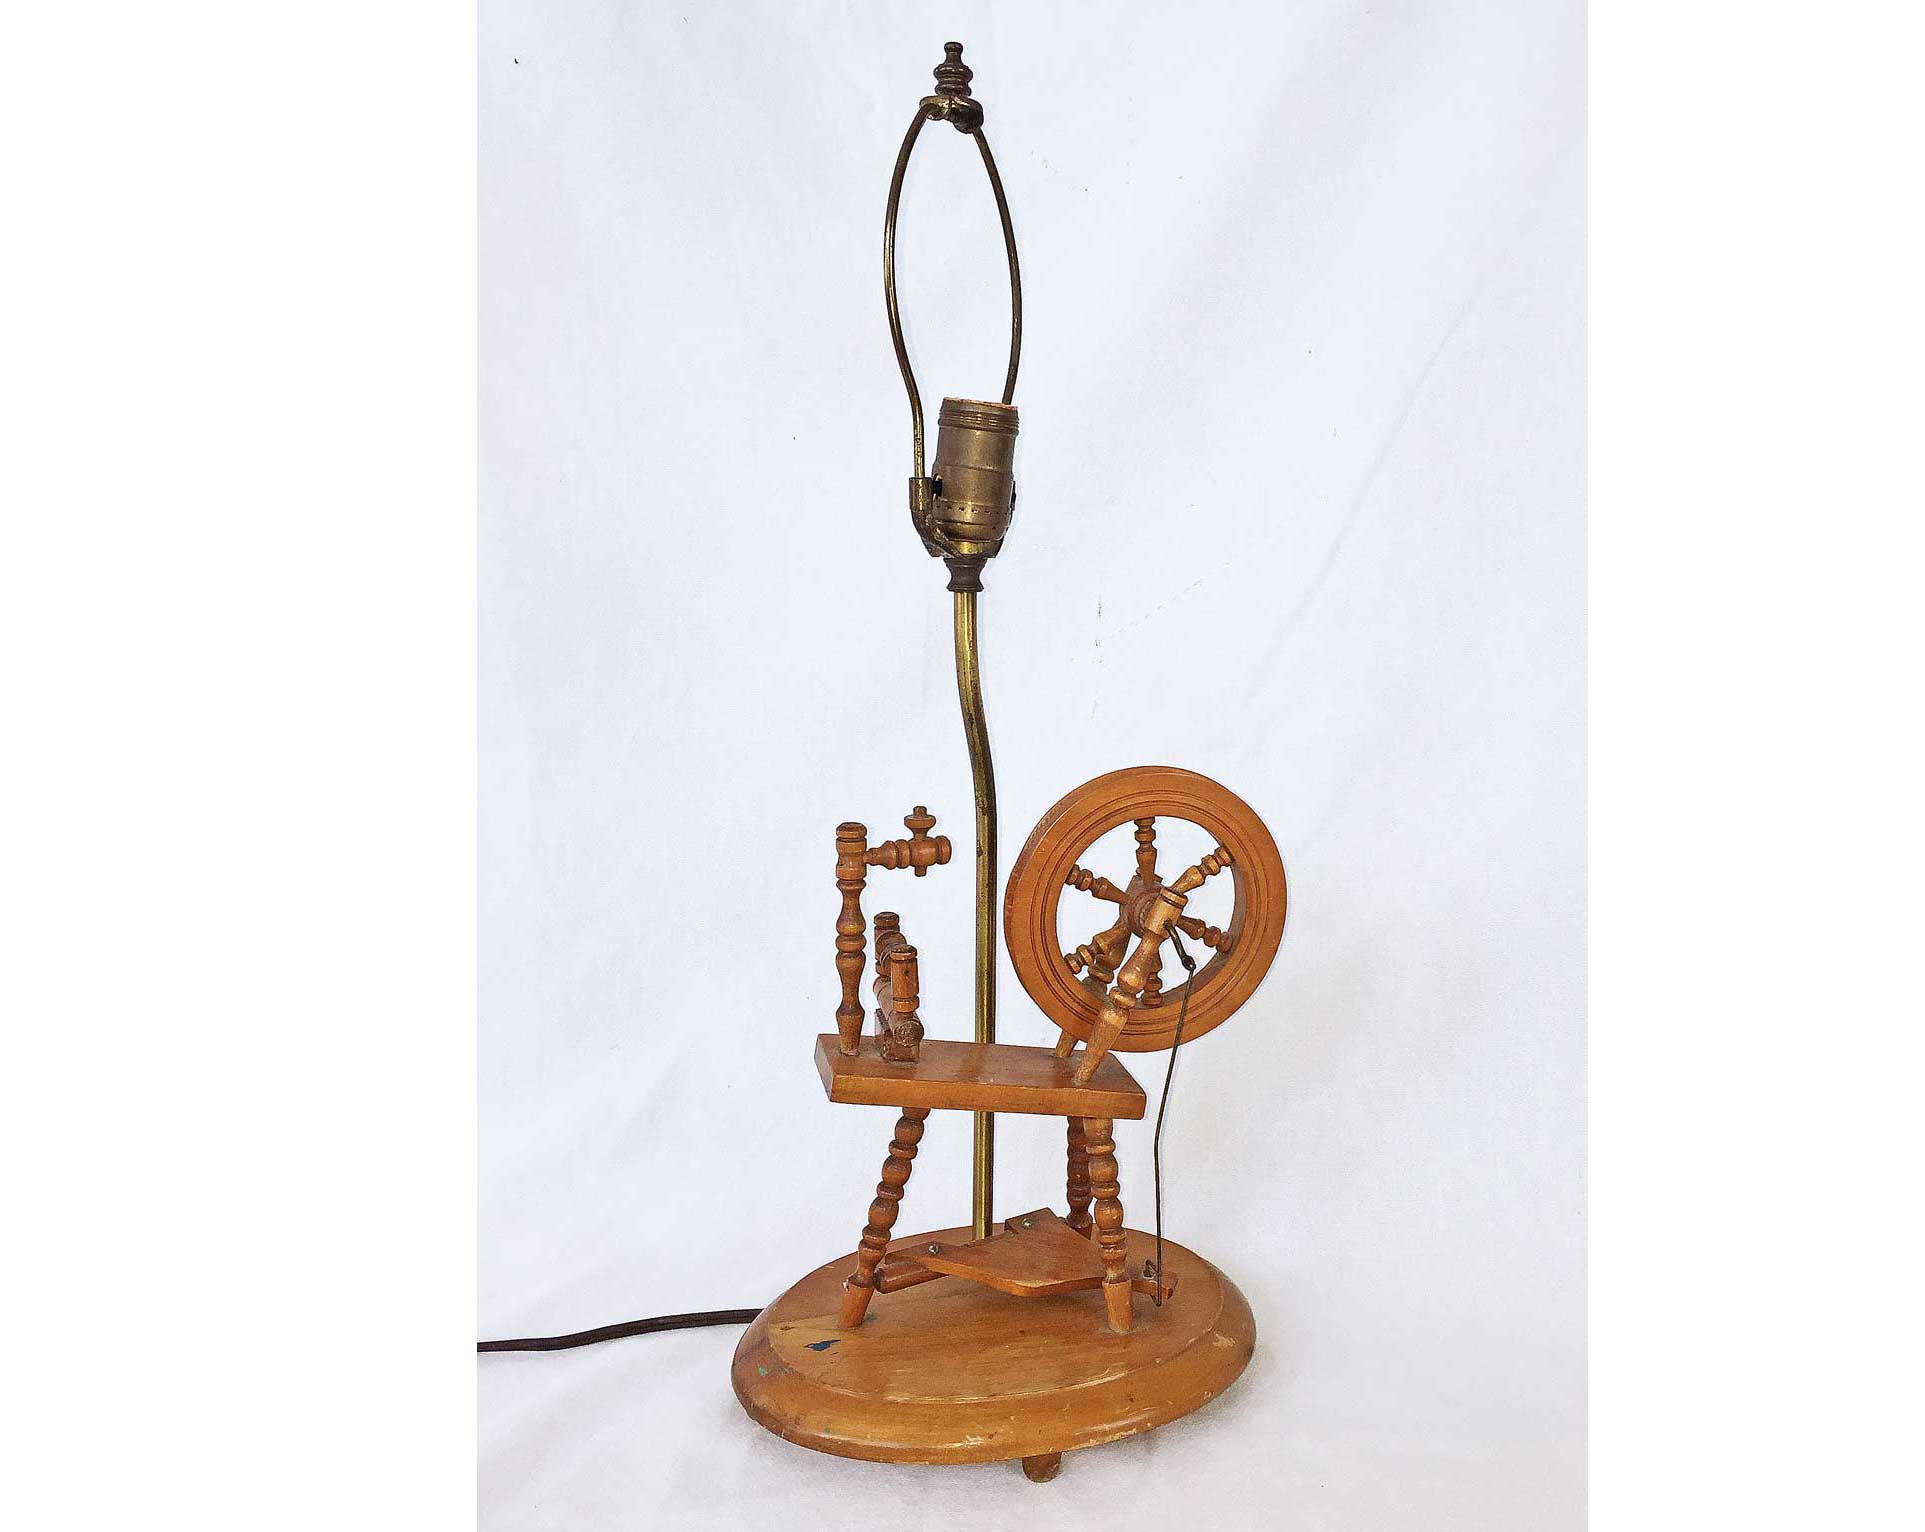

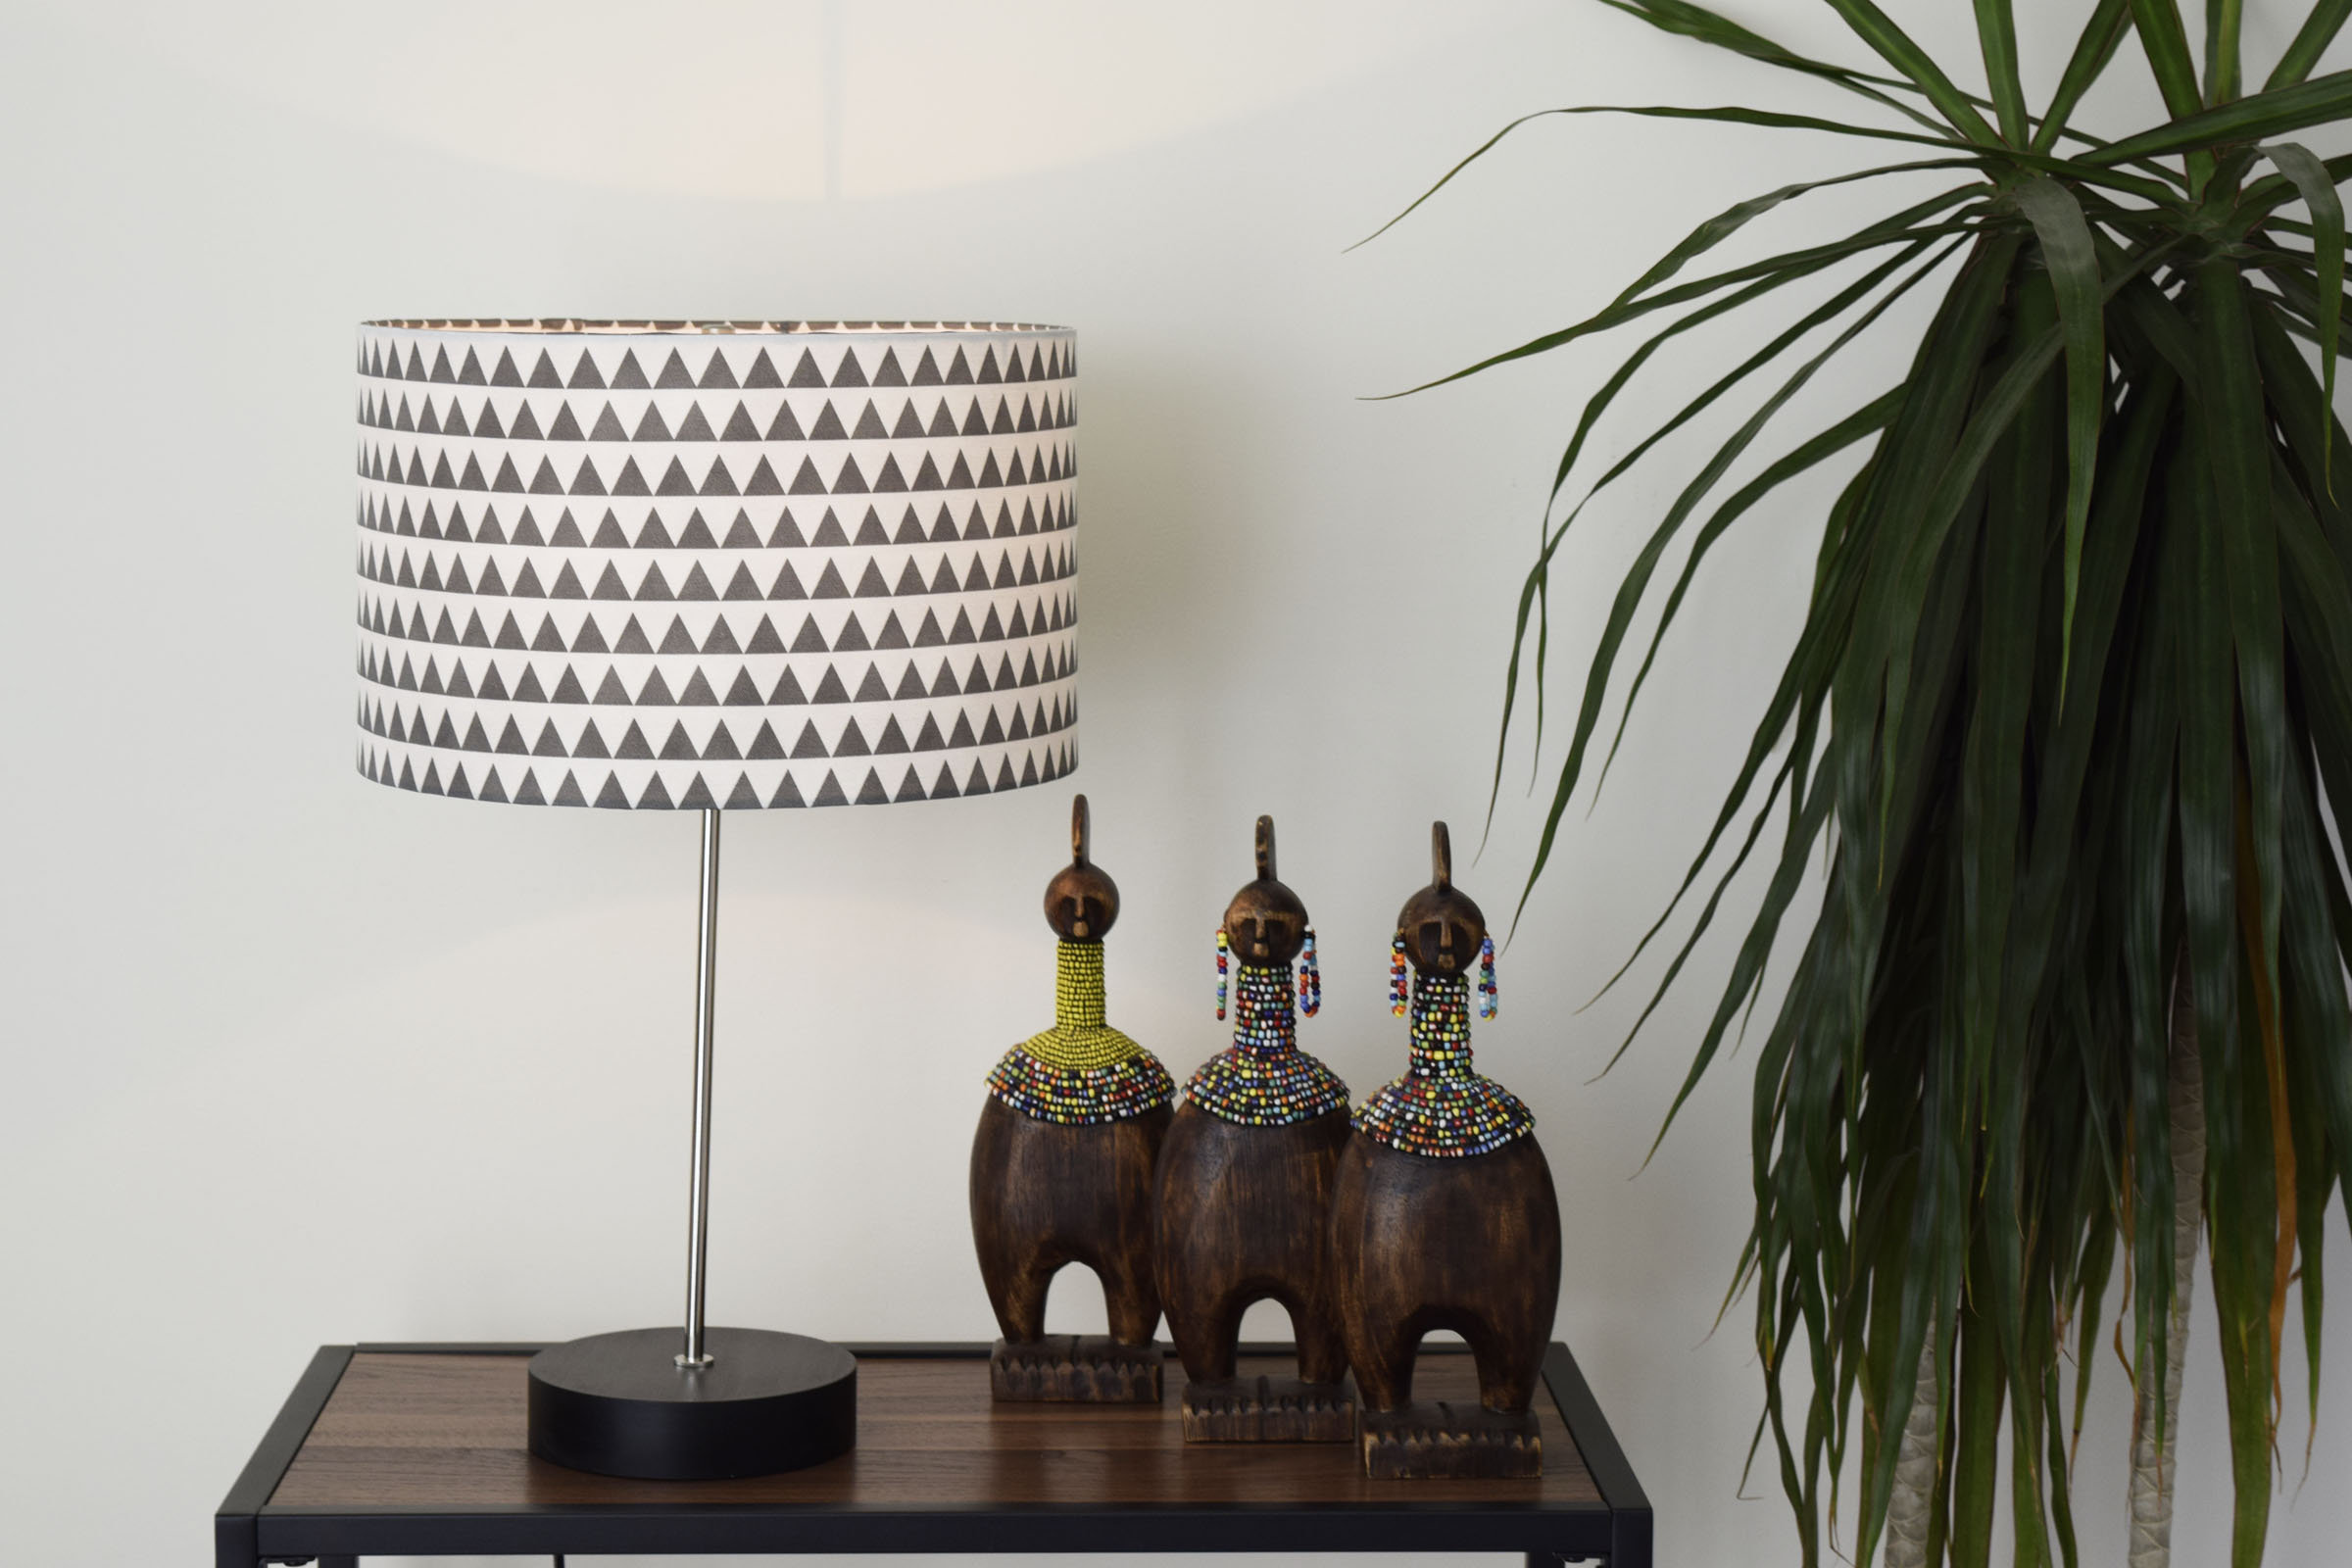

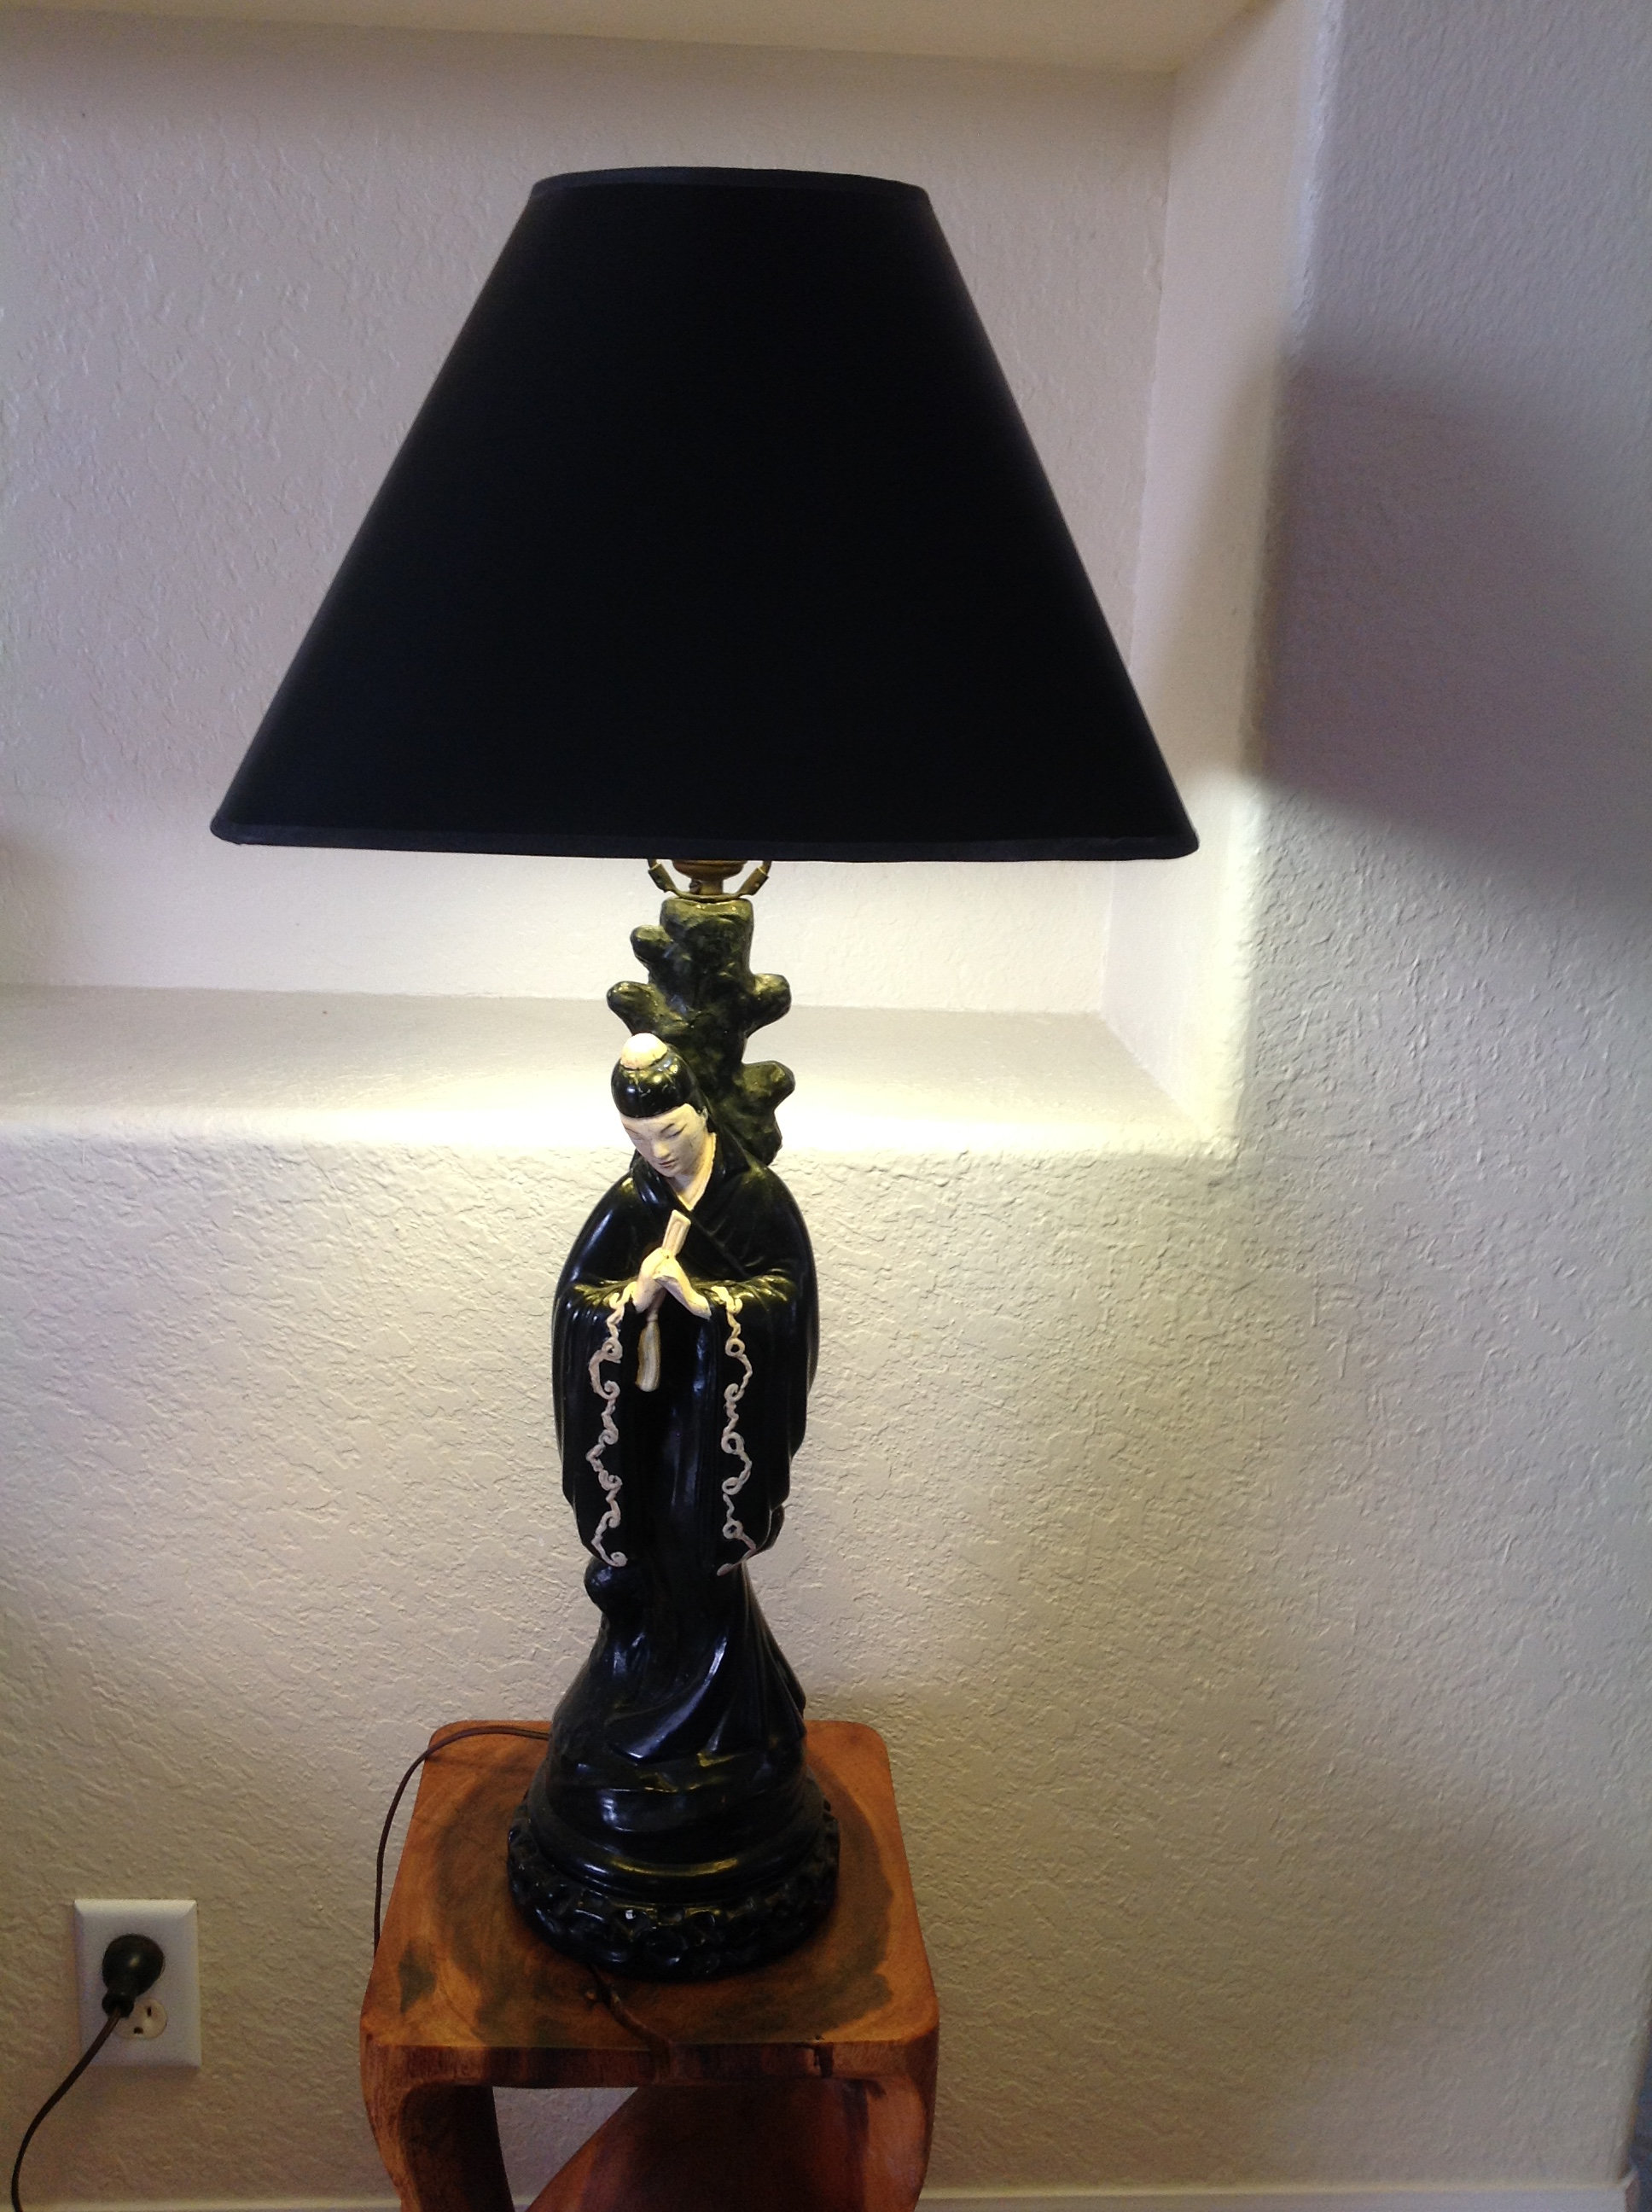

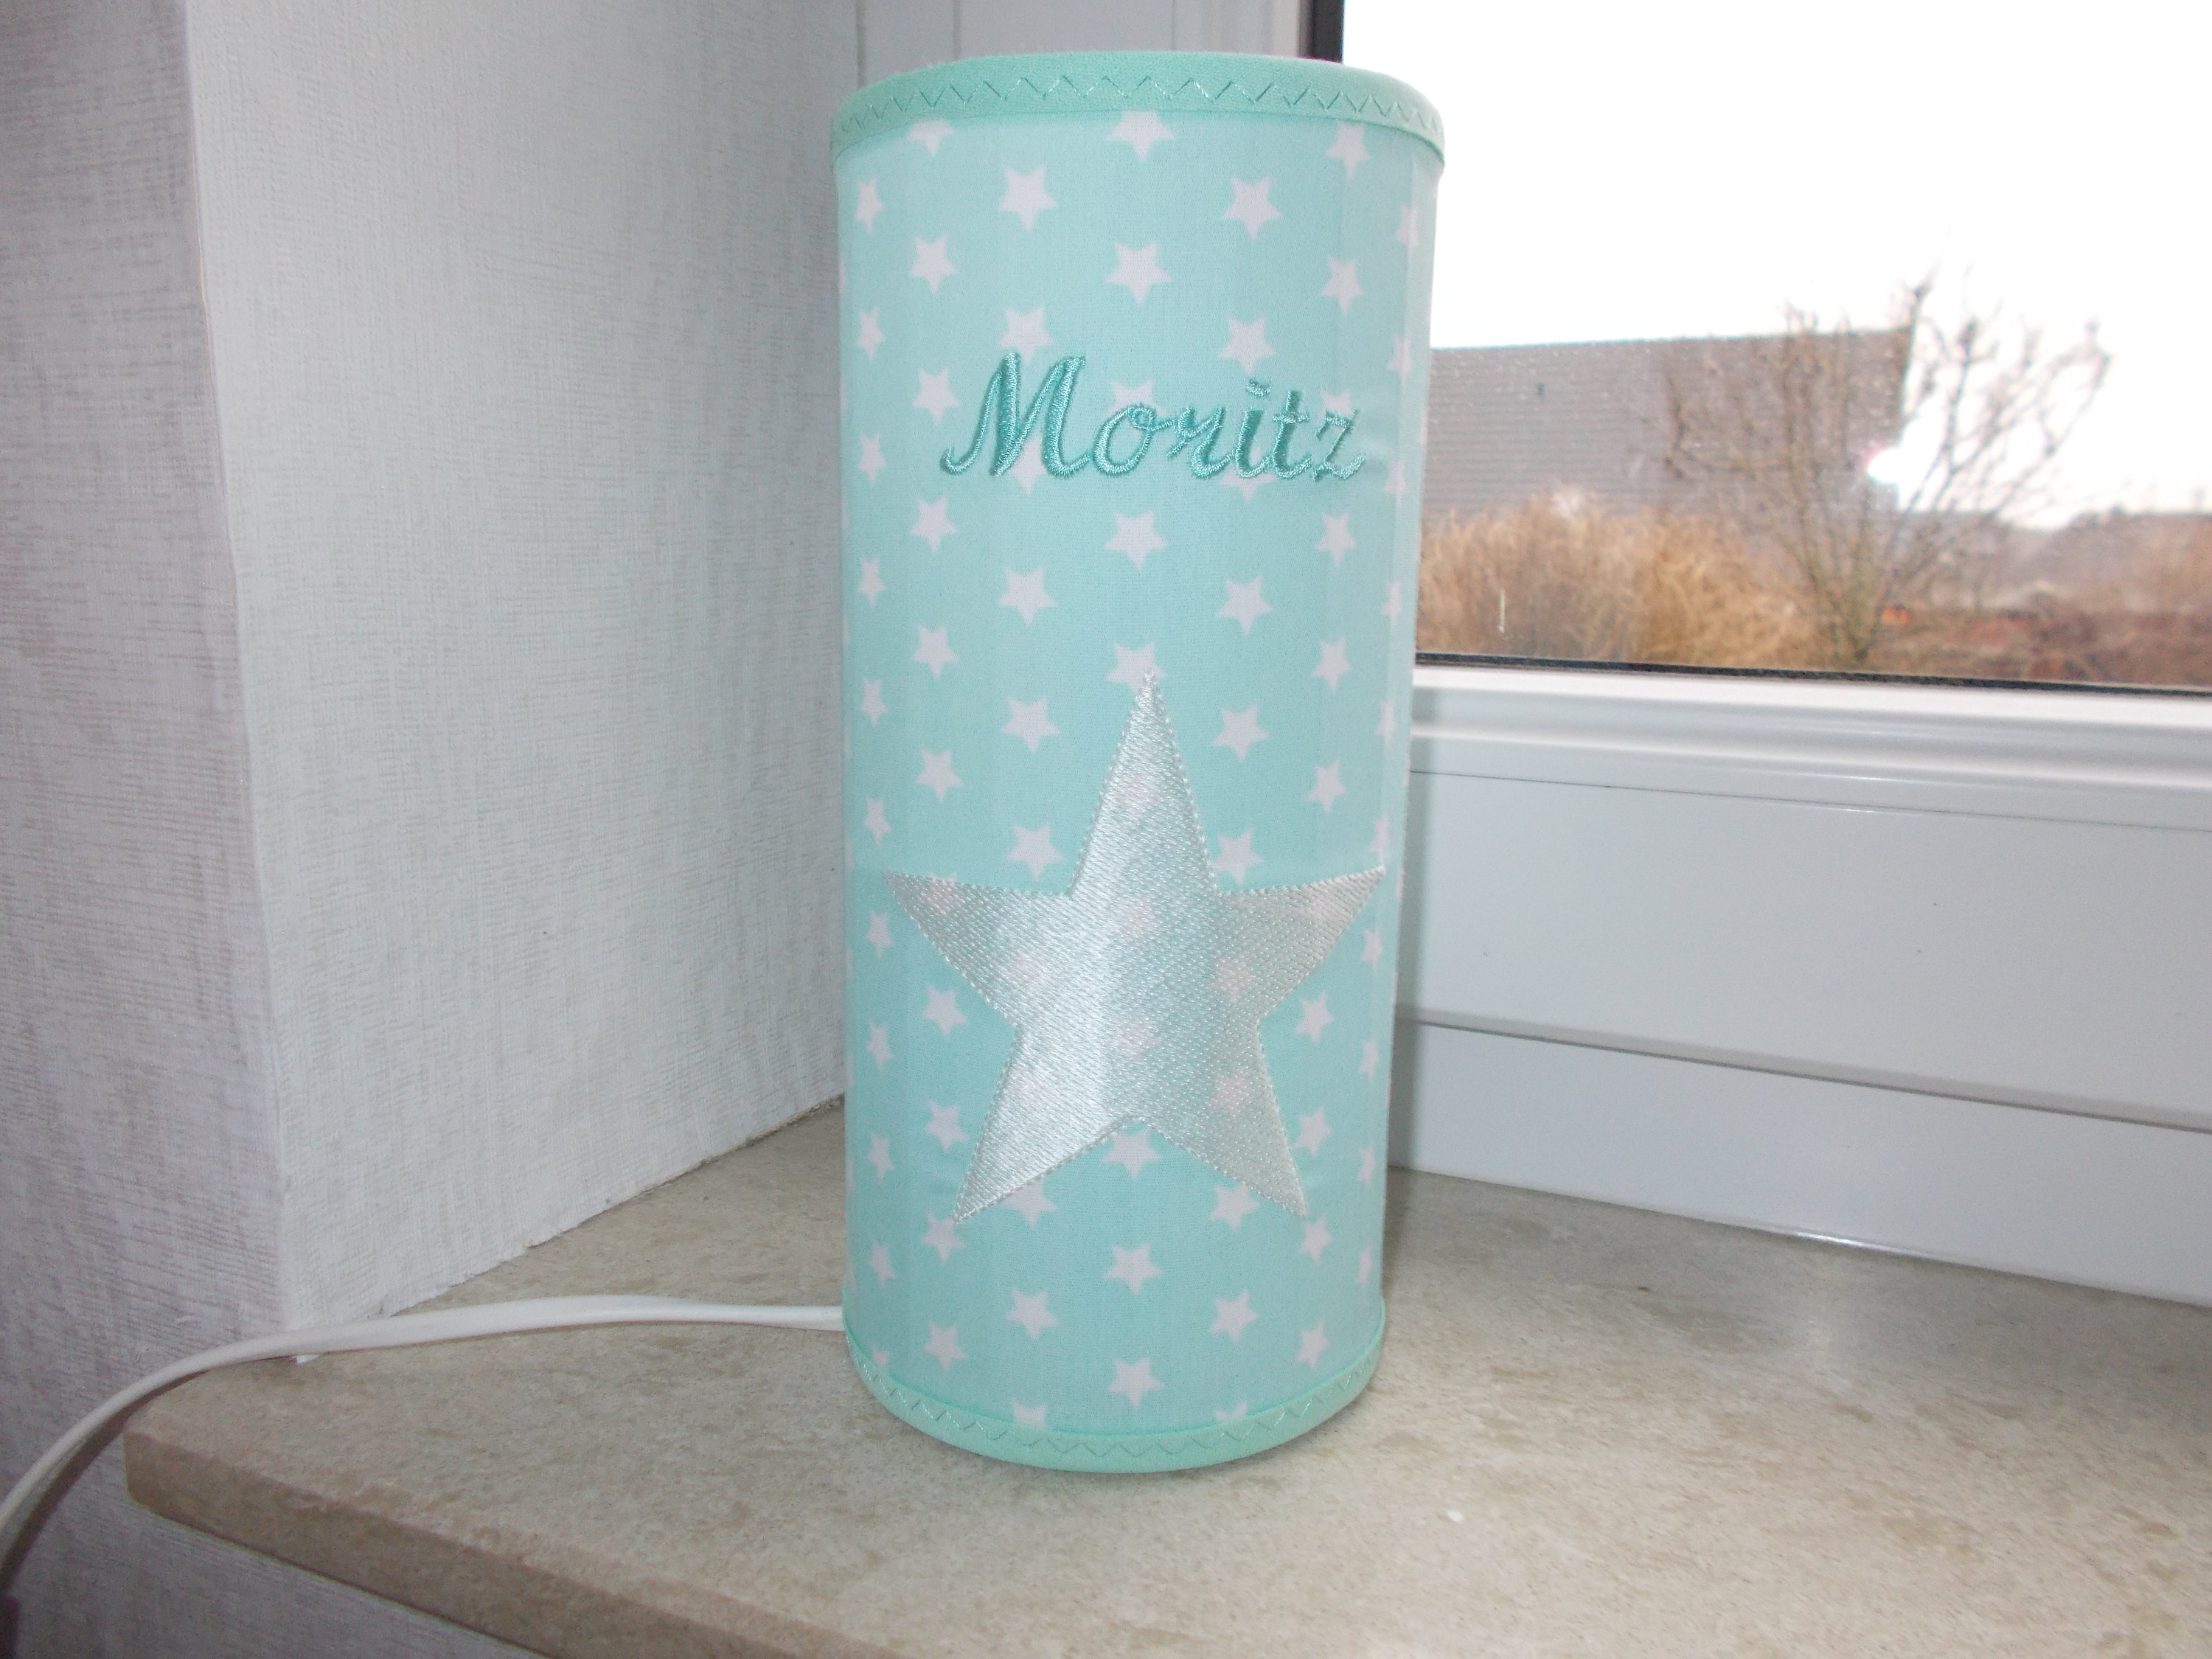

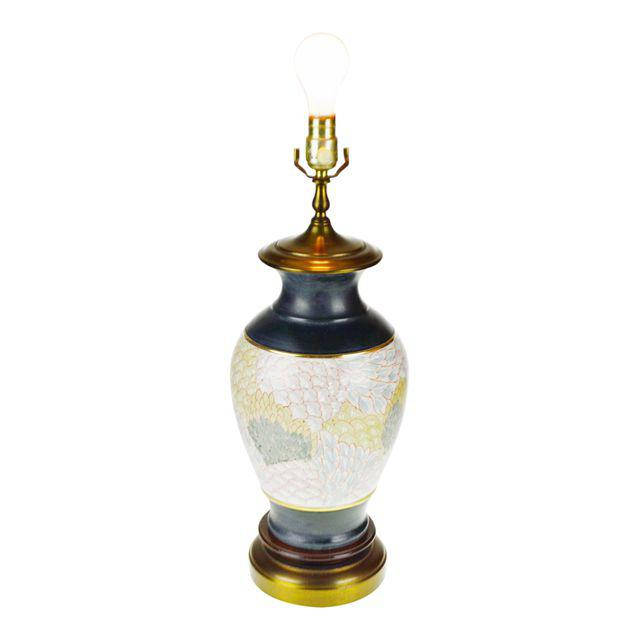

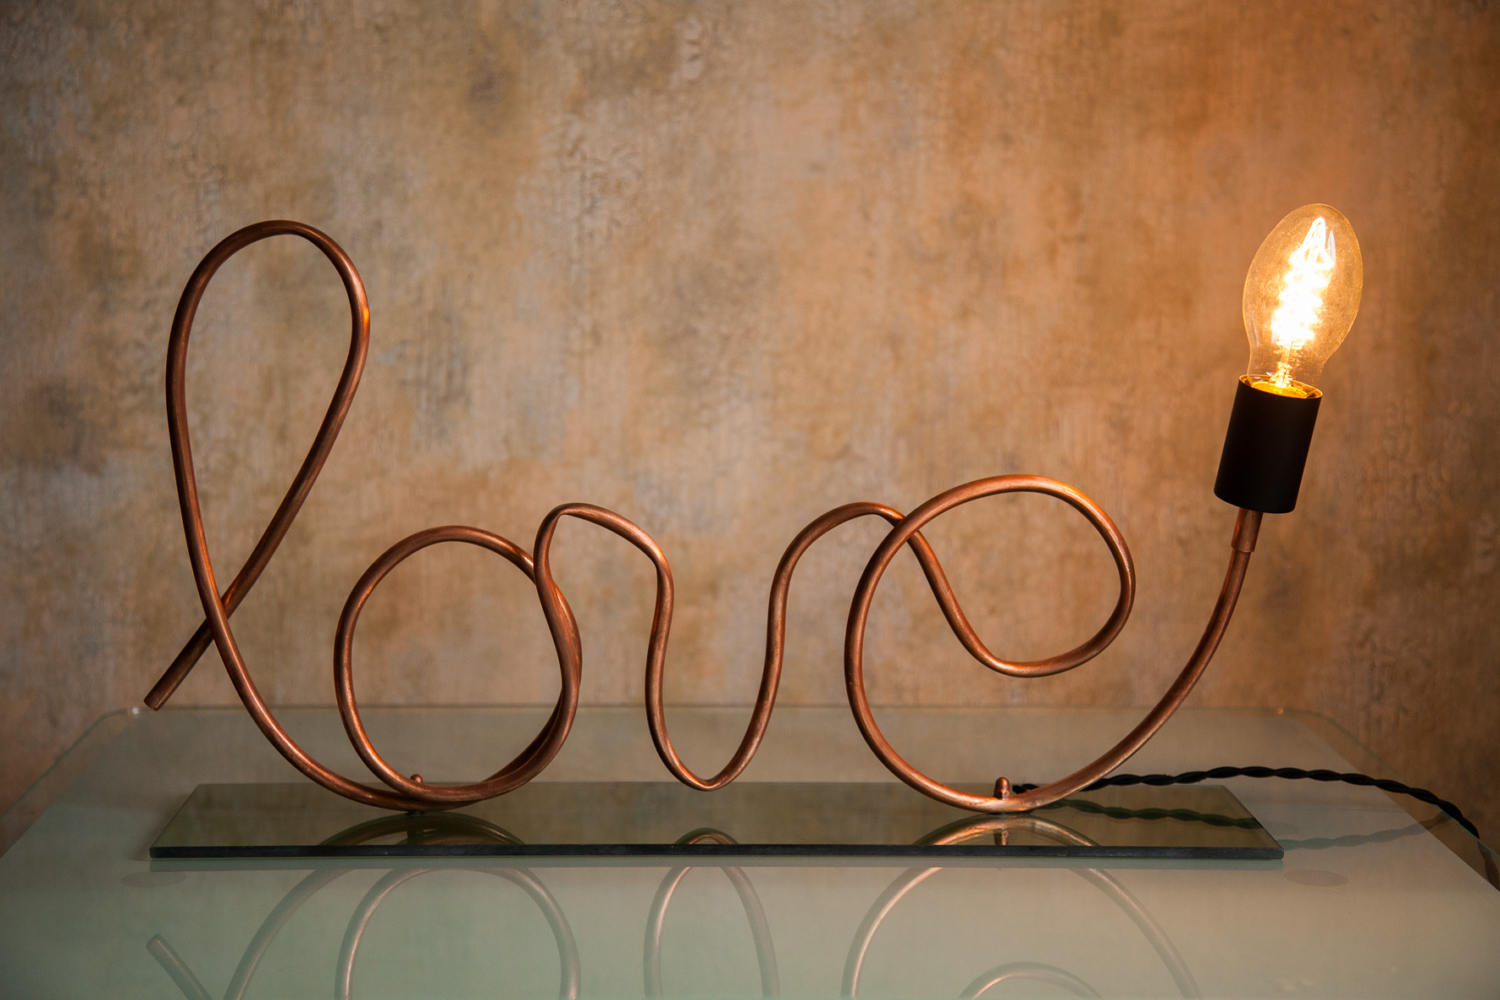

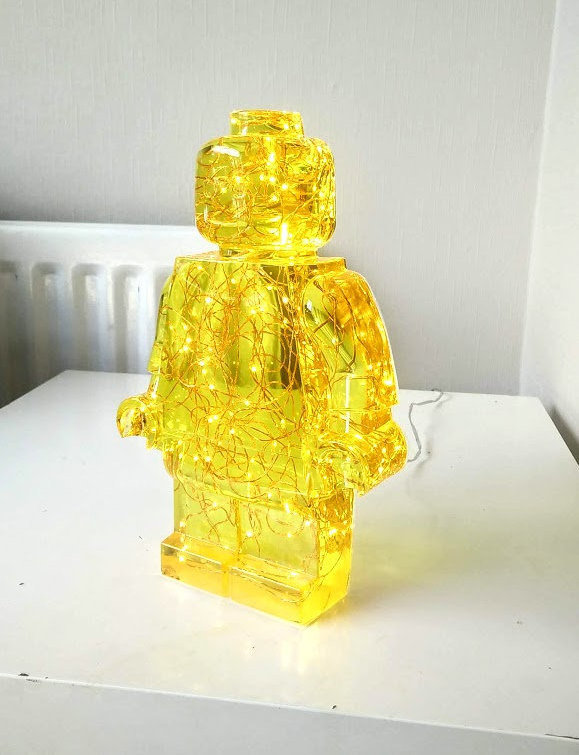

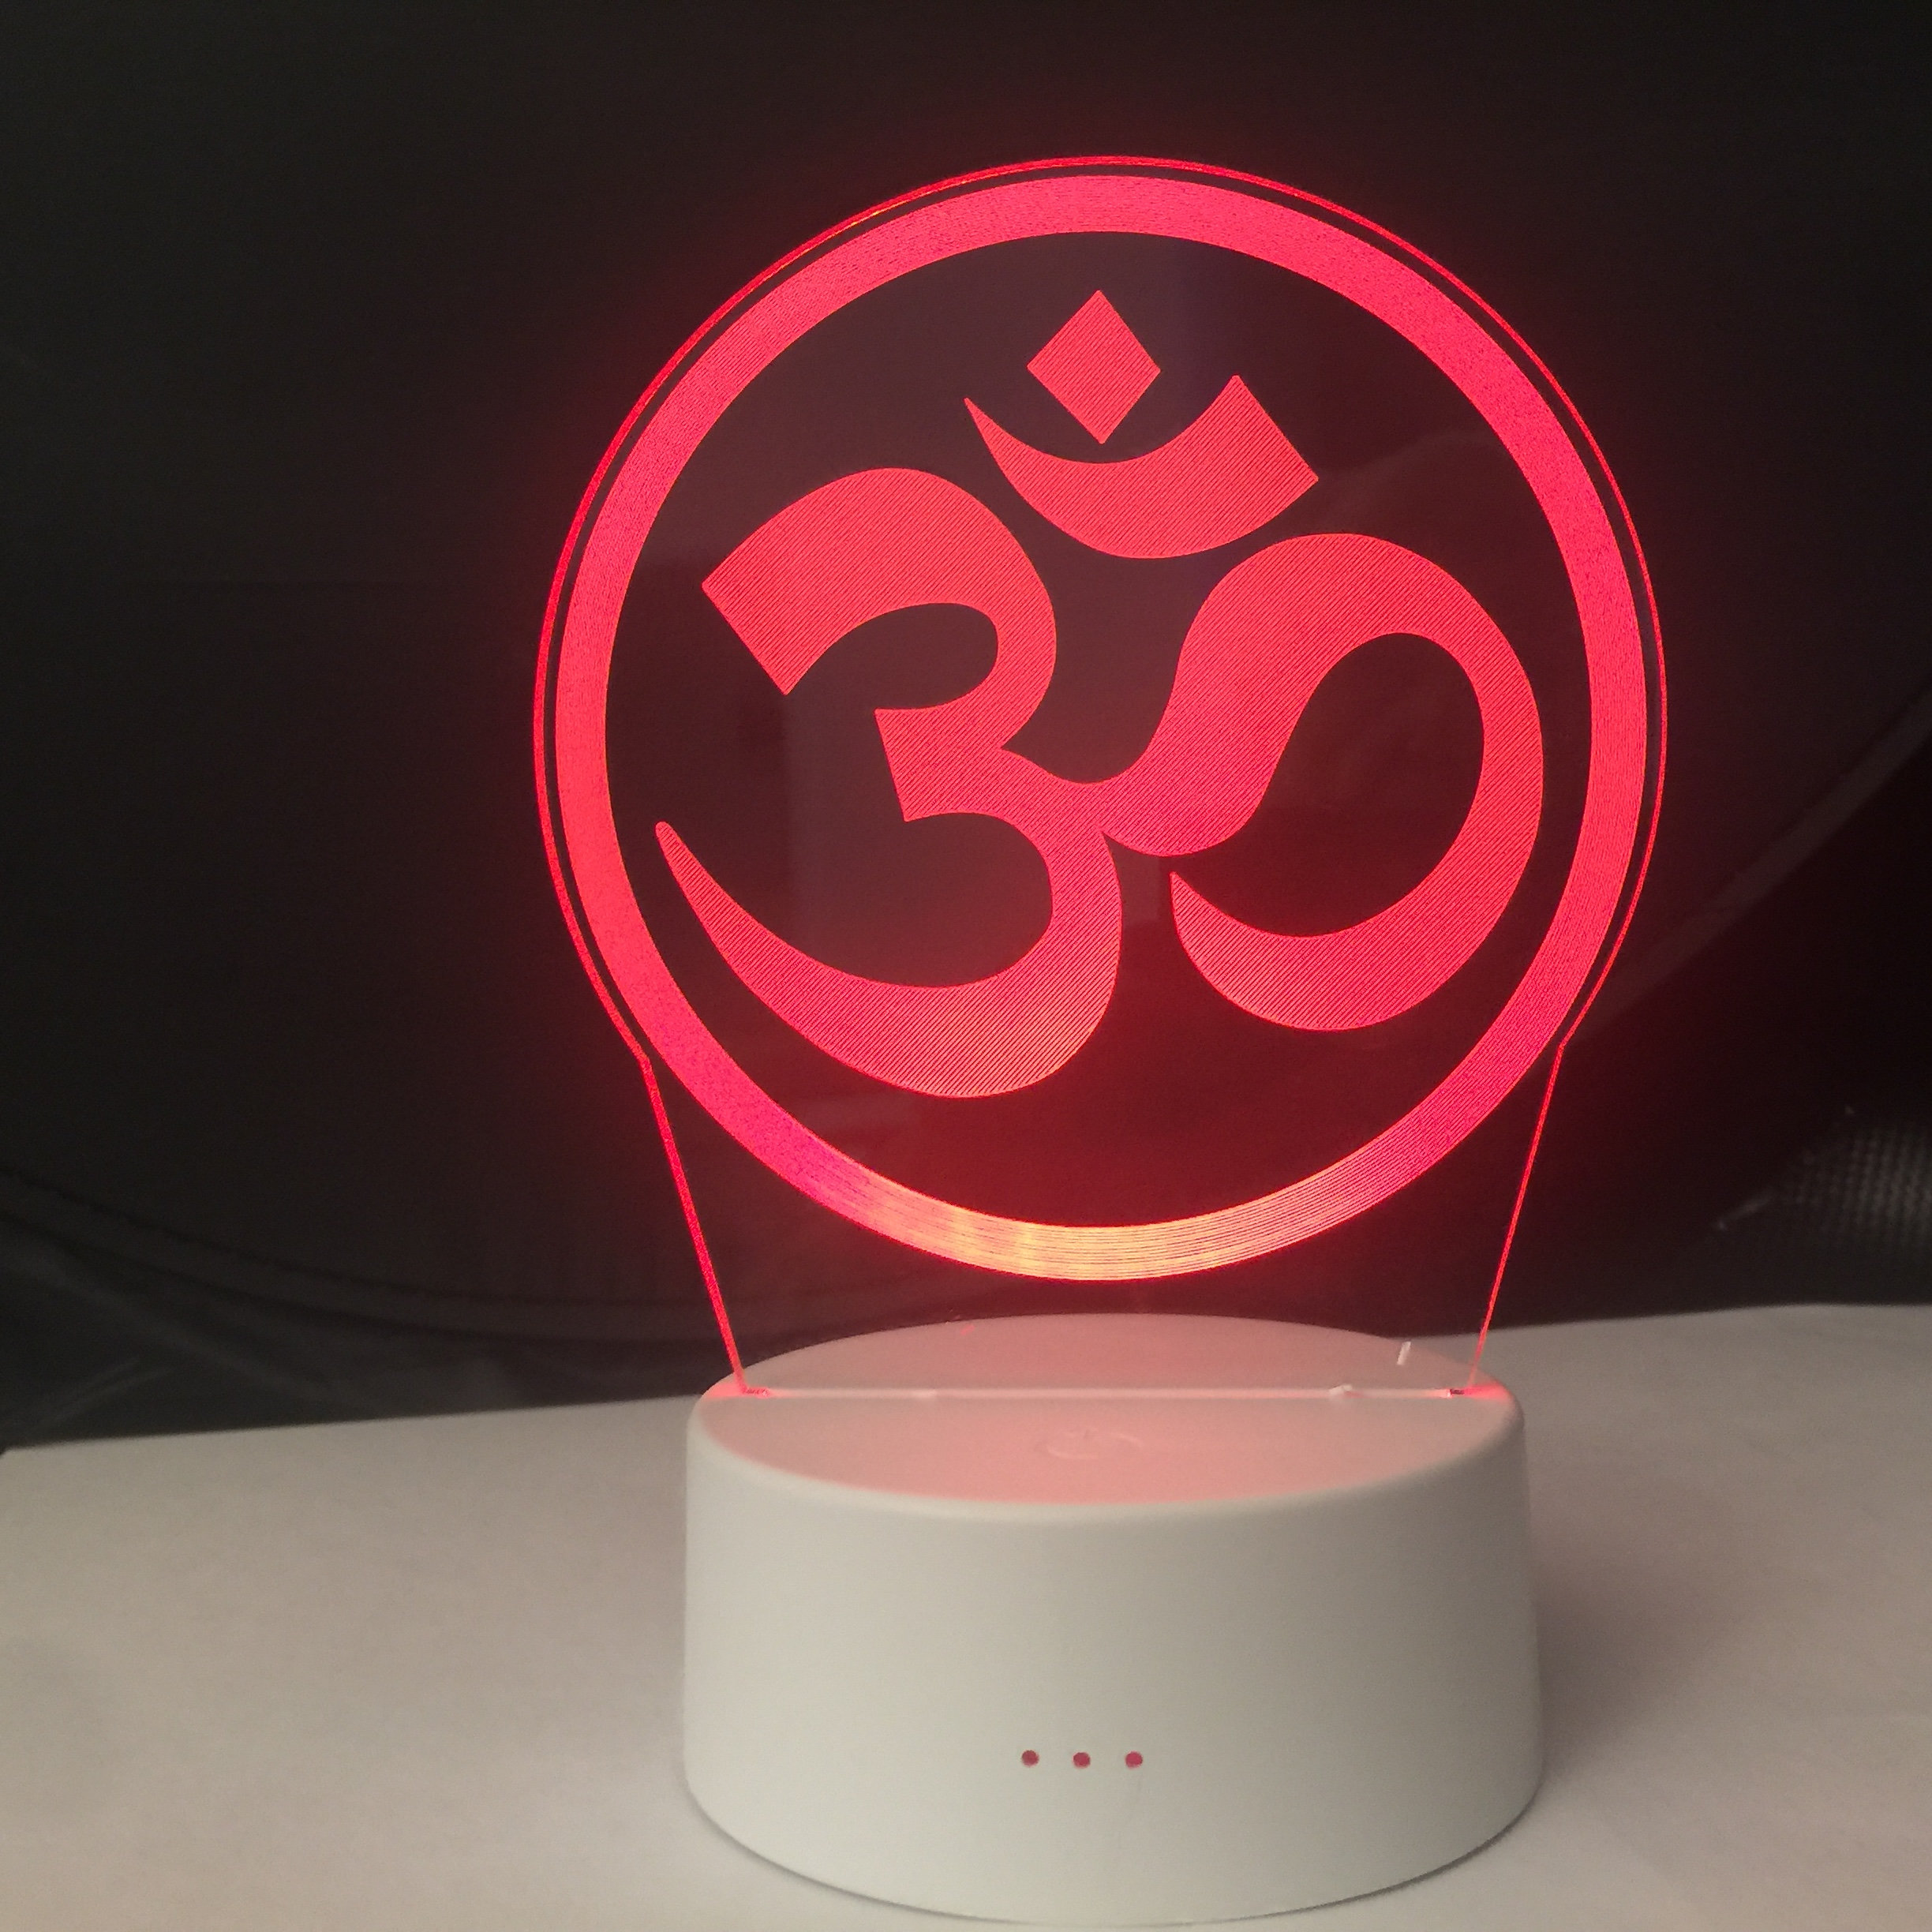

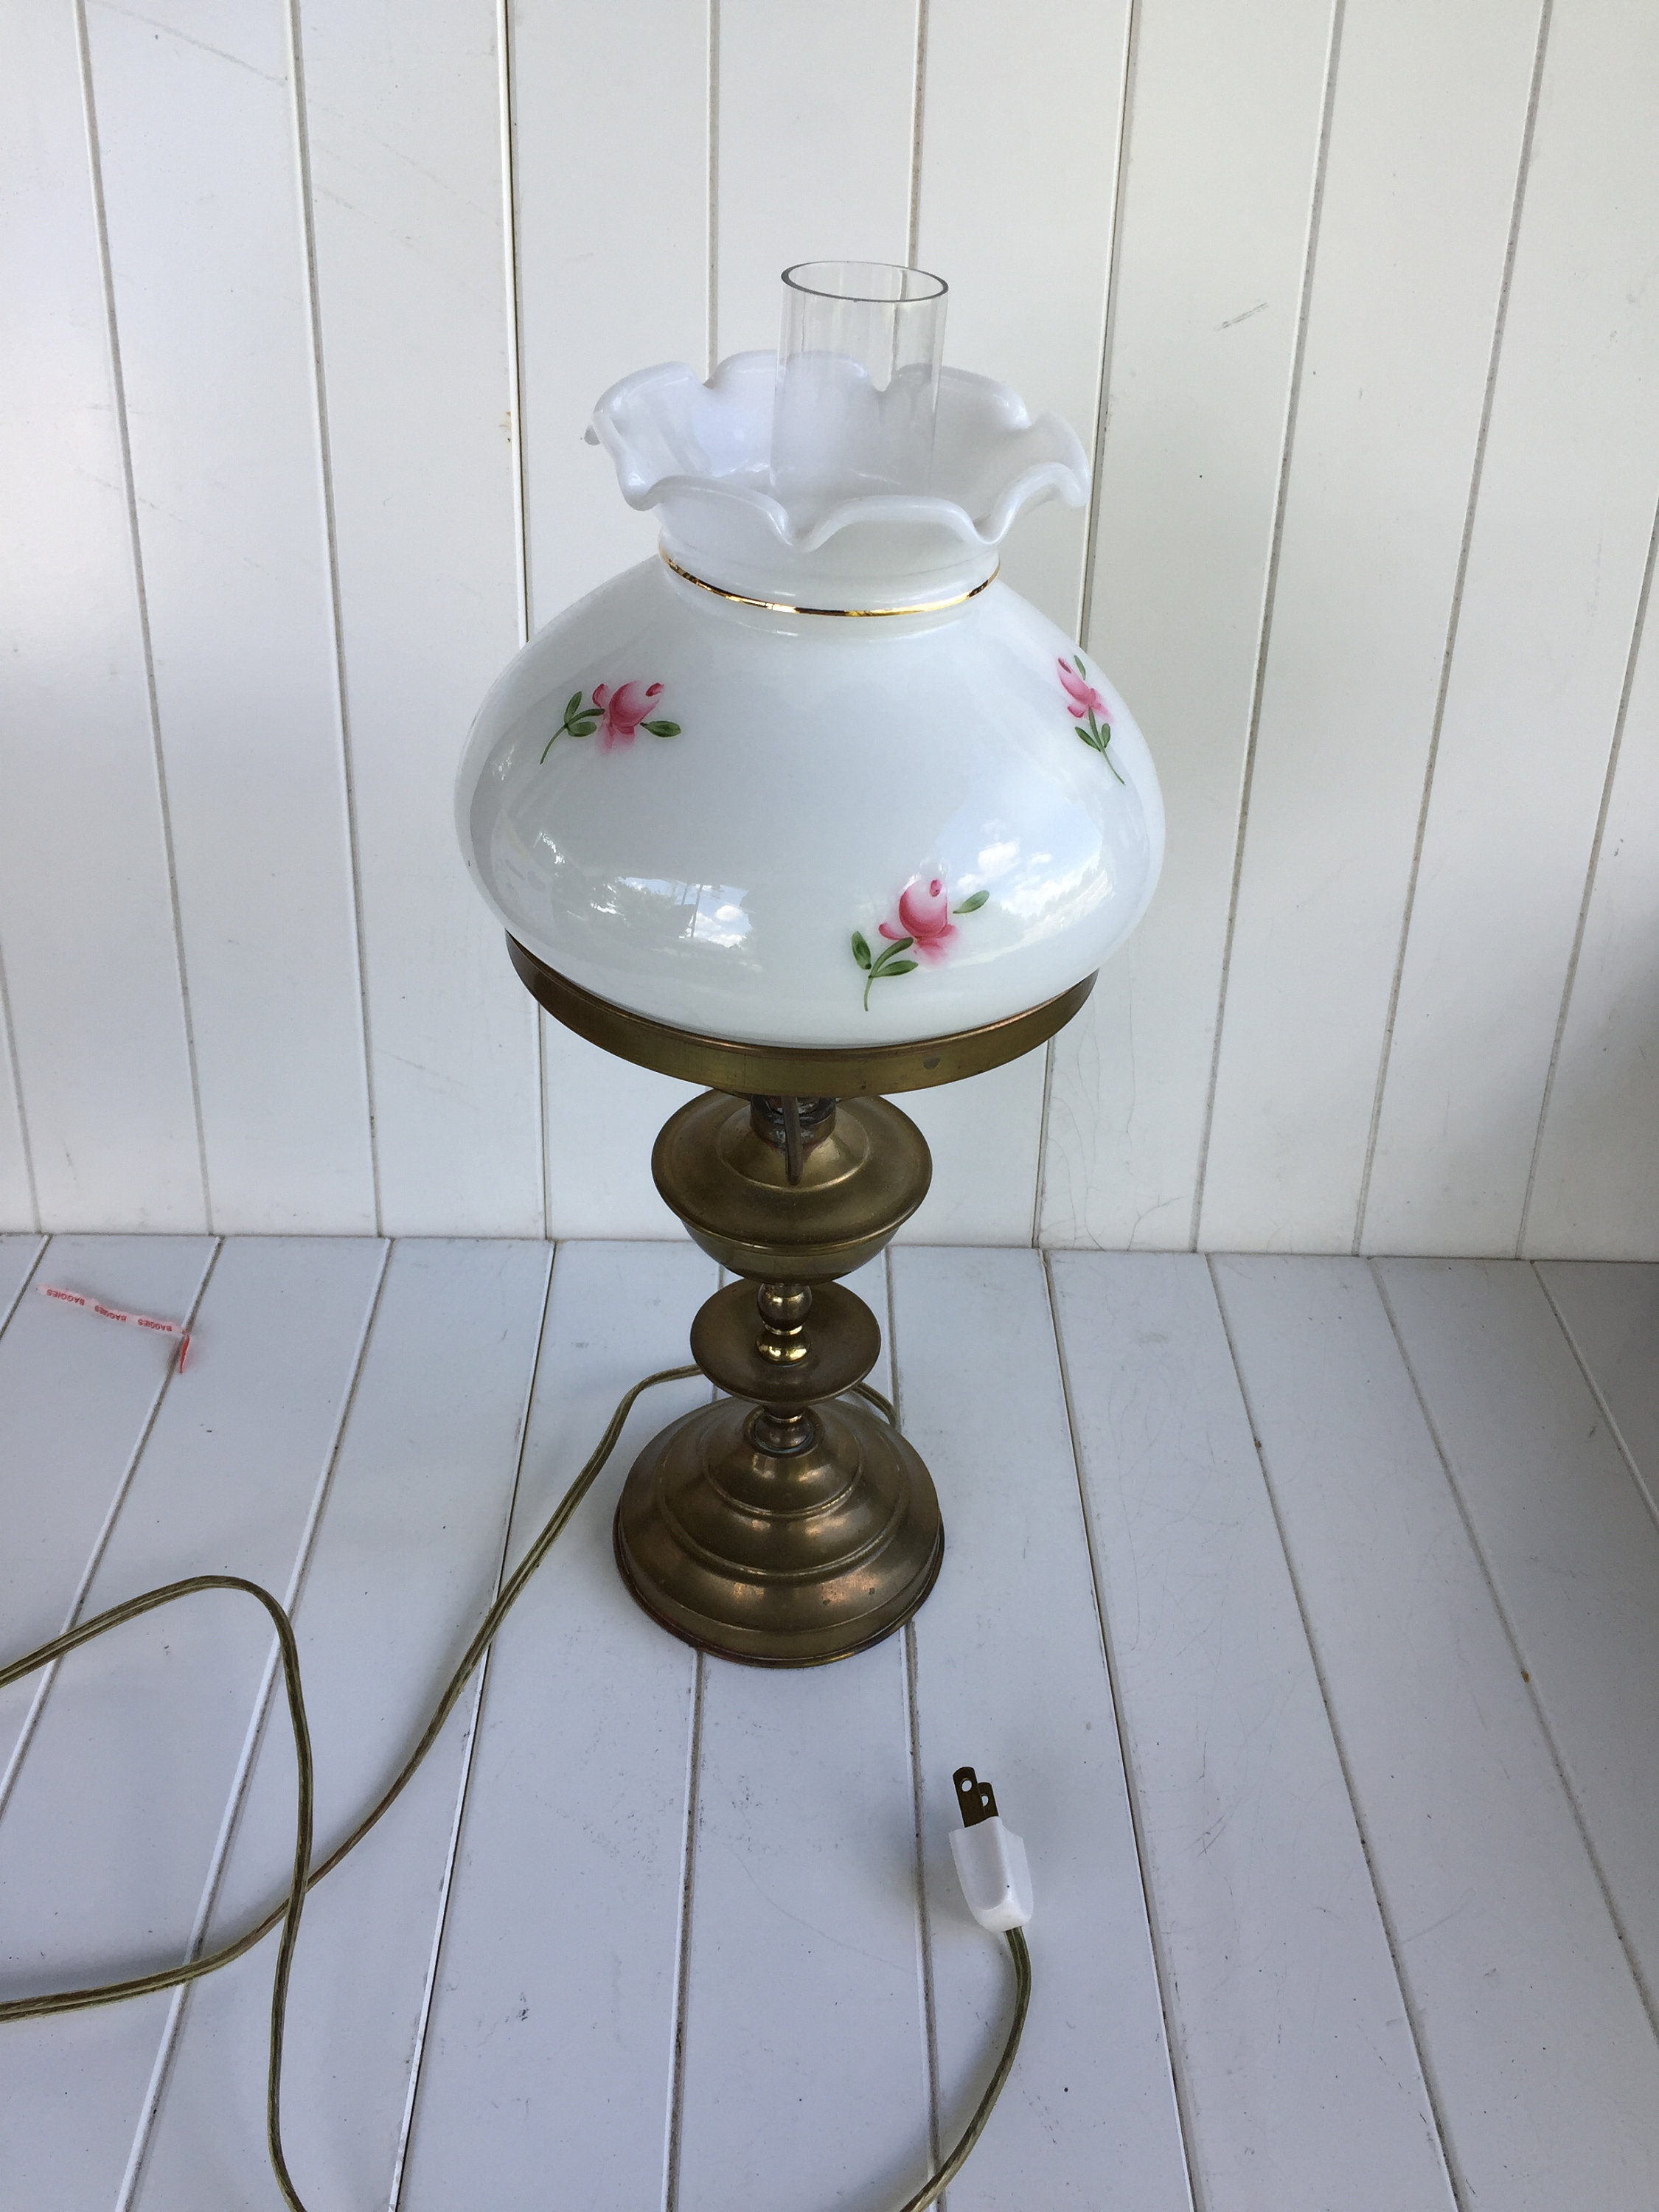

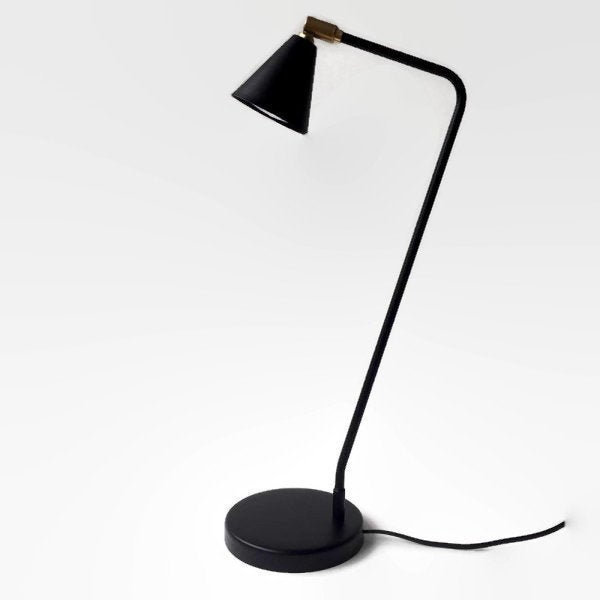

In [19]:
def get_centroids(jpg_of_images, closest):
    centroid_path = []
    for index in closest:
        x = jpg_of_images[index]
        display(Image(filename='{}'.format(x)))

 

get_centroids(jpg_of_images, closest)

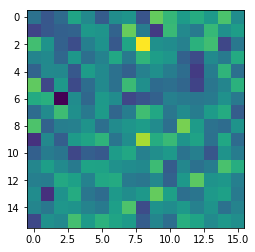

In [25]:
x = centroids.reshape(3, 16,16)*255
plt.imshow(x[0])

In [16]:
# tSNE
## importing the required packages
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)

X = data
n_samples, n_features = X.shape
n_neighbors = 30


In [33]:

## Loading and curating the data
digits = datasets.load_digits(n_class=10)

n_neighbors = 30


{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of

In [79]:
len(digits.target)

1797

In [81]:
len(kmeans.labels_)

2186

In [105]:
target = np.array(range(10))
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [104]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
print(kmeans.labels_)
centroids = kmeans.cluster_centers_ # 10 clusters, 256 features
centroids

[1 4 0 ... 3 0 3]


array([[ 0.00088619, -0.04075315, -0.08198389, ...,  0.02420938,
        -0.02638866,  0.01738282],
       [ 0.00334165, -0.11018324, -0.06985833, ...,  0.0142869 ,
         0.01718282,  0.02449468],
       [-0.02528843, -0.0367232 , -0.02850529, ..., -0.00605039,
         0.00879755,  0.00409204],
       [-0.01395074, -0.06859941, -0.02841627, ...,  0.01801123,
         0.01196252, -0.04131334],
       [-0.01221114, -0.01846401, -0.04308717, ...,  0.01874709,
        -0.01069309,  0.00397481]], dtype=float32)

Computing PCA projection
Computing t-SNE embedding


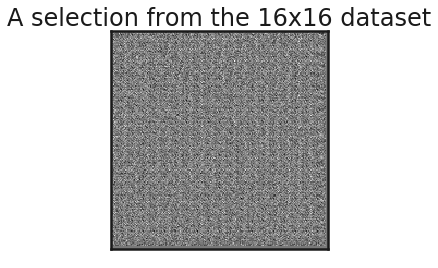

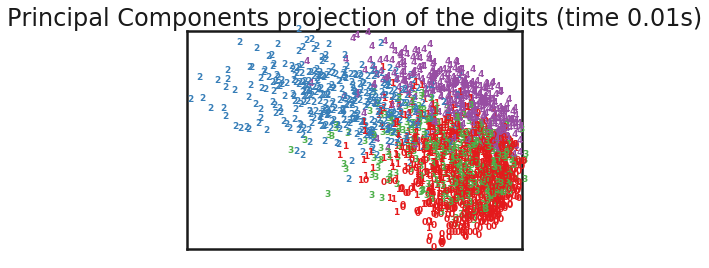

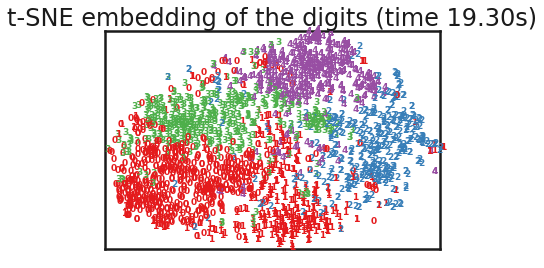

In [20]:

## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)  
    plt.figure()
    ax = plt.subplot(111)

    for i in range(X.shape[0]-1): # X.shape = 2186, 2

        plt.text(X[i, 0], X[i, 1], 
                 str(kmeans.labels_[i]), # LEN 2186
                 color=plt.cm.Set1(kmeans.labels_[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
#             imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(data.images[i], cmap=plt.cm.gray_r),
#                 X[i])
#             ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#----------------------------------------------------------------------
## Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        try:
            iy = 10 * j + 1
            img[ix:ix + 16, iy:iy + 16] = X[i * n_img_per_row + j].reshape((16, 16))
        except ValueError:
            ('error')
            
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 16x16 dataset')
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

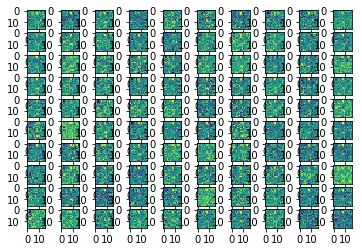

In [101]:
x = test_data.reshape(2186, 16, 16)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x[i])
# plt.imshow(x[2])

In [4]:
centroids = kmeans.cluster_centers_
centroids = centroids.reshape(10, 16,16)
centroids = centroids * 255

bottom = 0.35
for i in range(10):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.imshow(centroids[i])


NameError: name 'kmeans' is not defined

In [124]:
list(zip(data_scaled[0], data_scaled[1], data_scaled[2], data_scaled[3]))

[(0.0022220195, -0.092412725, 0.021320669, -0.040146608),
 (-0.018582072, 0.02675298, -0.07724552, -0.031524196),
 (-0.15542671, -0.036255267, -0.087848365, 0.10748409),
 (-0.0034743203, -0.06811307, -0.014022549, -0.050169896),
 (-0.024976442, -0.025004977, -0.038766693, 0.0565399),
 (-0.052684553, 0.043240312, 0.018041352, -0.039357666),
 (-0.09456751, 0.00468568, -0.0014982909, 0.08082224),
 (-0.01337421, 0.014869323, 0.035021447, 0.07463454),
 (-0.07282144, -0.060696602, -0.004596463, -0.070323415),
 (0.01858637, 0.09539235, 0.104110405, 0.032700706),
 (0.05758636, 0.002131783, 0.07248563, 0.001269618),
 (0.0011493582, -0.00029410867, 0.03420714, -0.022227172),
 (0.0582583, 0.059554614, 0.049973205, 0.031199044),
 (-0.0005258215, 0.008431856, 0.037577942, -0.07610317),
 (0.06825575, 0.10886061, 0.03843934, 0.13250849),
 (0.039726682, 0.07847516, 0.015271833, 0.07509615),
 (-0.07736116, -0.0058783675, -0.07333862, -0.07498081),
 (-0.07873721, -0.034307968, 0.01921101, 0.024449483),


In [12]:
len(kmeans.cluster_centers_)

3

[[ 1.32360533e-02  5.28847128e-02]
 [-3.16064060e-02 -5.40978983e-02]
 [ 8.43661875e-02  5.23196869e-02]
 [-9.48977992e-02 -9.68375653e-02]
 [ 4.96555269e-02 -2.23570559e-02]
 [-4.69601192e-02  3.82335596e-02]
 [ 8.00285190e-02  1.51733011e-01]
 [-1.96066890e-02  1.60850566e-02]
 [ 1.24379911e-01  3.91370915e-02]
 [-8.52781162e-02 -5.06623555e-03]
 [ 5.14880382e-02 -4.30932827e-02]
 [-1.54017270e-01 -1.03197910e-01]
 [-1.94101967e-02 -7.71038886e-03]
 [ 3.40902619e-02 -1.18423268e-01]
 [ 4.12830673e-02  1.07533850e-01]
 [ 3.75872254e-02 -2.81896535e-03]
 [-6.46479428e-02 -4.27736826e-02]
 [ 2.00307779e-02 -4.55998331e-02]
 [-8.50792304e-02 -1.45878389e-01]
 [ 1.71234608e-01  1.80321515e-01]
 [ 7.03255907e-02  1.07207010e-02]
 [ 1.11223206e-01  8.14865530e-02]
 [-1.19362399e-01 -5.40114418e-02]
 [ 2.33167107e-03  3.74350720e-03]
 [ 3.13585699e-02  3.26750465e-02]
 [ 9.04426426e-02  1.10022500e-01]
 [ 3.47451977e-02  6.48350939e-02]
 [-3.67056802e-02 -9.85483006e-02]
 [ 1.60083249e-01  3

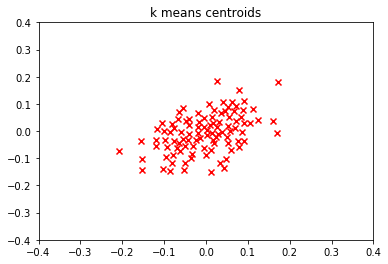

In [11]:
data=test_data

x1 = np.array(test_data[0])
x2 = np.array(test_data[1])
# x3 = np.array(test_data[2])
# x4 = np.array(test_data[3])
# x5 = np.array(test_data[4])
# x6 = np.array(test_data[5])


# create new plot and data
plt.plot()
# X = np.array(list(zip(x1, x2, x3, x4, x5, x6))).reshape(len(x1), 6)
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

colors = ['b', 'g', 'c']
markers = ['o', 'v', 's']

# KMeans algorithm 
K = 100
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], 
#              x2[i], 
#              color=colors[l], 
#              marker=markers[l],
             ls='None')
    
plt.xlim([-.4, .4])
plt.ylim([-.4, .4])

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
# plt.scatter(centers[:,1], centers[:,1], marker="x", color='b')

# plt.scatter(centers[:,2], centers[:,3], marker="x", color='b')
# plt.scatter(centers[:,4], centers[:,5], marker="x", color='g')
# plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')


plt.show()

array([False, False, False, False, False, False])

Centroids:
[[-0.02634286 -0.04312709 -0.0321258  ... -0.005383    0.03357238
   0.0023756 ]
 [-0.0515452  -0.03259172 -0.00963306 ...  0.03712038  0.00165304
  -0.05692385]
 [-0.00623926 -0.02305386 -0.05042337 ...  0.023299   -0.01317526
   0.00159754]
 ...
 [-0.00728266 -0.03113679 -0.08318016 ...  0.01367967 -0.03279822
   0.01287463]
 [-0.00594977 -0.03133231 -0.07172357 ...  0.03068219 -0.02041381
   0.01830403]
 [ 0.00419424 -0.06591048 -0.0623315  ...  0.0241337  -0.002035
  -0.01128525]]


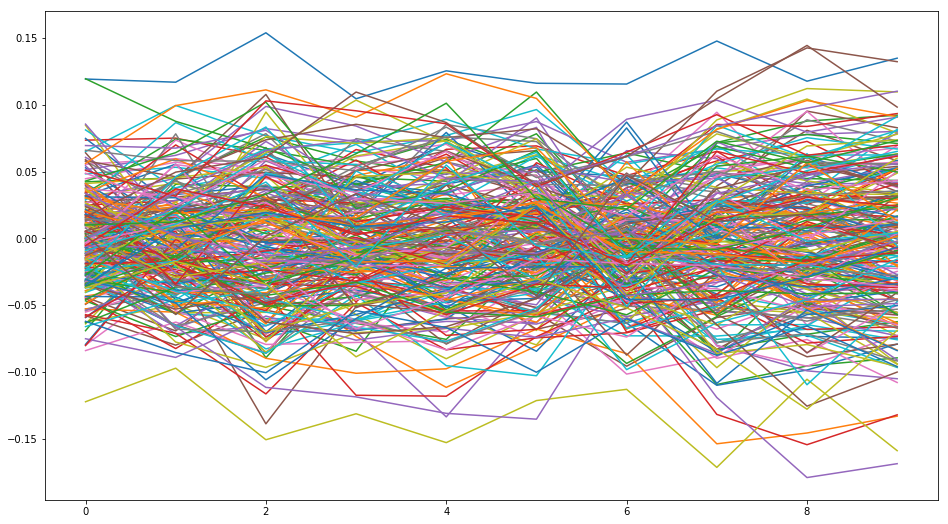

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, 
                                  affinity='euclidean', 
                                  linkage='ward'
                                 )
y_predict = cluster.fit_predict(data)
cluster_labels = cluster.labels_

from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(data_scaled, y_predict)
print("Centroids:")
print(clf.centroids_)

plt.figure(figsize=(16,9))
plt.plot(clf.centroids_);


In [15]:
!pip install seaborn --ignore-installed scipy
import sklearn.cluster as cluster
import time
import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()

#1
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# plot_clusters(data_scaled, cluster.KMeans, (), {'n_clusters':2})
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})



     |████████████████████████████████| 215 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 60.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 49.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 53.8 MB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 48.0 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 9.1 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 61.3 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 66.1 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 64.8 MB/s eta 0:00:01
ERROR: witwidget 1.6.0 has requirement oauth2client>=4.1.3, but you'll have oauth2client 3.0.0 which is incompatible.
ERROR: tfx 0.22.0 has requirement pyarrow<0.17,>=0.16, but you'll have pyarrow 0.17.1 which is incompatible.
ERROR: tfx-bs

NameError: name 'plot_clusters' is not defined

In [14]:
#2 
plt.scatter(data_scaled[:,0],
            data_scaled[:,1], 
            c=cluster.labels_, 
            cmap='rainbow'
           )
plt.yticks(np.arange(-0.3, 0.3, step=0.1))
plt.xticks(np.arange(-0.3, 0.3, step=0.1),
          )
plt.show();
#     >>> xticks(np.arange(12), calendar.month_name[1:13], rotation=20)



AttributeError: 'module' object has no attribute 'labels_'

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

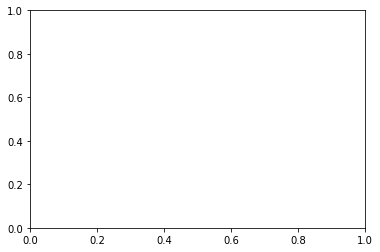

In [15]:
#3 
from sklearn.cluster import KMeans


wcss=[]

for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
        
kmeans.fit(data_scaled)
wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

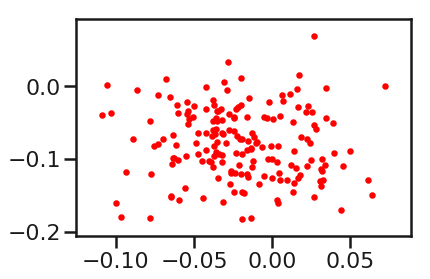

In [147]:
#4 KMEANS 

X=data_scaled
kmeans = KMeans(n_clusters=10, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)


plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=20, c='red', label ='Cluster 1')
# plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
# plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
# plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(X[y_kmeans==6, 0], X[y_kmeans==6, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(X[y_kmeans==7, 0], X[y_kmeans==7, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(X[y_kmeans==8, 0], X[y_kmeans==8, 1], s=100, c='cyan', label ='Cluster 4')
# plt.scatter(X[y_kmeans==9, 0], X[y_kmeans==9, 1], s=100, c='magenta', label ='Cluster 5')

In [144]:
y_kmeans

array([9, 9, 9, ..., 8, 3, 0], dtype=int32)